In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# nfragments

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from ast import literal_eval as make_tuple
import matplotlib.pyplot as plt
import os

RESULT_NAME = "1689251079_result_beans_CKA_BS_32_MD_16_T_0_TT_0.5_K_4"
figFolder = f'_results/{RESULT_NAME}_figures'
os.makedirs(figFolder, exist_ok=True)

data = pd.read_csv(f'_results/{RESULT_NAME}.txt', names=['score','acc','macs','params','path','fragments'])

sns.set_theme()

In [4]:
print('# network generated: ', len(data))

# network generated:  100


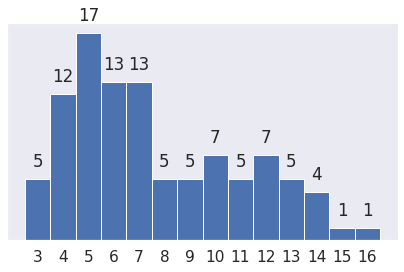

In [5]:
nfragments = [len(make_tuple(fragments)) for fragments in data['fragments']]

sns.set(font_scale = 1.4)
fig, ax = plt.subplots(figsize=[7, 4])
sns.set(font_scale = 1.4)

ax.grid(False)
# ax.hist(nfragments)

# n, bins, patches = ax.hist(nfragments, bins=5)
n, bins, patches = ax.hist(nfragments, np.array(range(min(nfragments)-1,max(nfragments)+1))+0.5)
# plt.xticks(range(min(nfragments),max(nfragments)+1))
# plt.xlabel('Number of fragments')
# plt.tick_params(left = False, labelleft = False)

xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{}".format(int((value+bins[idx+1])/2.)) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
# plt.subplots_adjust(bottom=0.2)
plt.savefig(f'{figFolder}/numfragments.eps',bbox_inches='tight')

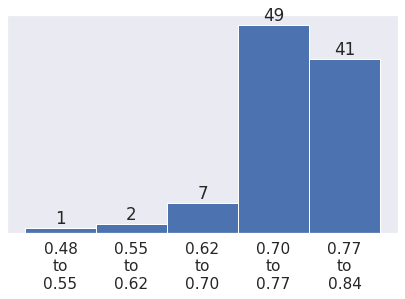

In [6]:
acc = data['acc']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)
n, bins, patches = ax.hist(acc, bins=5)
# plt.xlabel('Accuracy')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')

plt.savefig(f'{figFolder}/accuracy.eps',bbox_inches='tight')

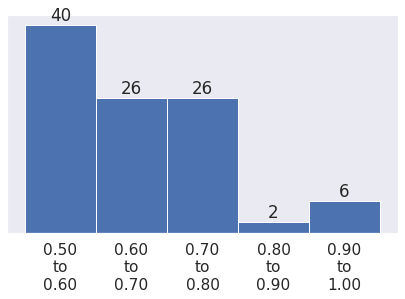

In [7]:
score = data['score']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)
n, bins, patches = ax.hist(score, bins=5)
# plt.xlabel('Score')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
plt.savefig(f'{figFolder}/score.eps',bbox_inches='tight')

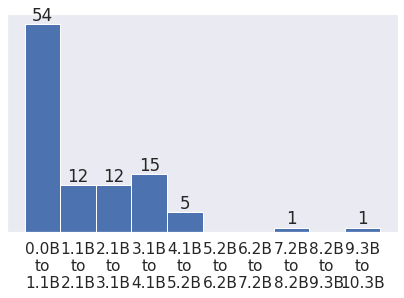

In [8]:
import matplotlib.pyplot as plt

macs = data['macs']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)
n, bins, patches = ax.hist(macs, bins=10)
# plt.xlabel('# MACs (in billions)')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.1f}B\nto\n{:.1f}B".format(value/1000000000,bins[idx+1]/1000000000) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
plt.savefig(f'{figFolder}/macs.eps',bbox_inches='tight')

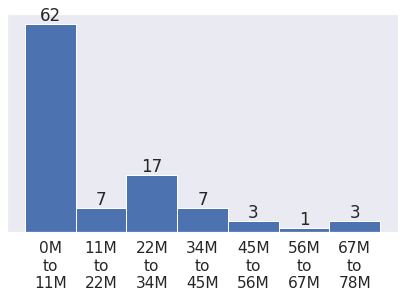

In [9]:
import matplotlib.pyplot as plt

params = data['params']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)

n, bins, patches = ax.hist(params, bins=7)
# plt.xlabel('# Params (in millions)')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.0f}M\nto\n{:.0f}M".format(value/1000000,bins[idx+1]/1000000) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
plt.savefig(f'{figFolder}/params.eps',bbox_inches='tight')

In [10]:
from glob import glob
import os
originalValTrainAcc = {}
originalFiles = sorted(glob('_results/original_beans/*.txt'))
originalNetNames = []
for originalFile in originalFiles:
    name = os.path.basename(originalFile)
    name = os.path.splitext(name)[0]
    originalNetNames.append(name)
    originalValTrainAcc[name] = pd.read_csv(originalFile, names=['valacc', 'trainacc','macs','params','score','fragments'])
    originalValTrainAcc[name] = originalValTrainAcc[name].iloc[0]
    originalValTrainAcc[name]['acc'] = originalValTrainAcc[name].valacc   
    originalValTrainAcc[name].name = name
    print(originalValTrainAcc[name])


valacc                                                0.742188
trainacc                                              0.879699
macs                                               714695028.0
params                                                61100840
score                                                 0.826209
fragments    ((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...
acc                                                   0.742188
Name: alexnet, dtype: object
valacc                                       0.765625
trainacc                                     0.834586
macs                                     2841274151.2
params                                        8040040
score                                         0.99756
fragments    ((1, 0), (1, 1), (1, 2), (1, 3), (1, 4))
acc                                          0.765625
Name: densenet121, dtype: object
valacc                                                0.710938
trainacc                                              0.

In [11]:
# originalValTrainAcc[name]

In [12]:
acc_minidx = data['acc'].idxmin()
acc_maxidx = data['acc'].idxmax()
param_minidx = data['params'].idxmin()
param_maxidx = data['params'].idxmax()

print('param_minidx', param_minidx)
print('acc_maxidx', acc_maxidx)

originalValTrainAcc['best_stitchnet'] = data.iloc[acc_maxidx]
originalValTrainAcc['best_stitchnet'].name = 'best_stitchnet'
originalValTrainAcc['smallest_stitchnet'] = data.iloc[param_minidx]
originalValTrainAcc['smallest_stitchnet'].name = 'smallest_stitchnet'
# originalValTrainAcc['stitchnet70'] = data.iloc[70]
# originalValTrainAcc['stitchnet70'].name = 'stitchnet70'
originalValTrainAcc['stitchnet65'] = data.iloc[65]
originalValTrainAcc['stitchnet65'].name = 'stitchnet65'

param_minidx 75
acc_maxidx 89


In [13]:
# originalValTrainAcc

In [14]:
import pandas as pd

resultdata = pd.DataFrame(originalValTrainAcc.values())
resultdata = resultdata.sort_values('acc', ascending=False)

In [15]:
resultdata

,valacc,trainacc,macs,params,score,fragments,acc,path
best_stitchnet,NaN,NaN,3.296324e+09,16823400,0.594479,"((3, 0), (3, 1), (3, 2), (3, 3), (4, 14), (0, 7))",0.843750,_results/1689251079_result_beans_CKA_BS_32_MD_...
stitchnet65,NaN,NaN,5.928197e+07,2536528,0.764016,"((2, 0), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6...",0.820312,_results/1689251079_result_beans_CKA_BS_32_MD_...
vgg16,0.789062,0.842105,1.548098e+10,138357544,0.754073,"((4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5...",0.789062,NaN
densenet121,0.765625,0.834586,2.841274e+09,8040040,0.997560,"((1, 0), (1, 1), (1, 2), (1, 3), (1, 4))",0.765625,NaN
resnet50,0.765625,0.827068,4.099839e+09,25530472,0.972300,"((3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5))",0.765625,NaN
alexnet,0.742188,0.879699,7.146950e+08,61100840,0.826209,"((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...",0.742188,NaN
mobilenet_v3_small,0.710938,0.857143,6.010987e+07,2536800,0.999491,"((2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5...",0.710938,NaN
smallest_stitchnet,NaN,NaN,3.238386e+07,273664,0.546195,"((2, 0), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6...",0.640625,_results/1689251079_result_beans_CKA_BS_32_MD_...


In [16]:
data[data['acc'] > 0.8].sort_values('macs')

,score,acc,macs,params,path,fragments
70,0.649903,0.804688,5.494248e+07,961808,_results/1689251079_result_beans_CKA_BS_32_MD_...,"((2, 0), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6..."
54,0.740422,0.804688,5.577038e+07,962080,_results/1689251079_result_beans_CKA_BS_32_MD_...,"((2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5..."
68,0.716960,0.812500,5.824066e+07,1497680,_results/1689251079_result_beans_CKA_BS_32_MD_...,"((2, 0), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6..."
65,0.764016,0.820312,5.928197e+07,2536528,_results/1689251079_result_beans_CKA_BS_32_MD_...,"((2, 0), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6..."
43,1.000000,0.804688,6.010987e+07,2536800,_results/1689251079_result_beans_CKA_BS_32_MD_...,"((2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5..."
18,0.543656,0.820312,2.995039e+08,5218216,_results/1689251079_result_beans_CKA_BS_32_MD_...,"((0, 0), (0, 1), (0, 5), (0, 7))"
14,0.694606,0.812500,4.292727e+08,23449896,_results/1689251079_result_beans_CKA_BS_32_MD_...,"((0, 0), (0, 1), (0, 2), (0, 5), (0, 6), (0, 7))"
94,0.681190,0.812500,1.822233e+09,1952872,_results/1689251079_result_beans_CKA_BS_32_MD_...,"((3, 0), (3, 1), (3, 2), (2, 12))"
93,0.694617,0.804688,1.822233e+09,1952872,_results/1689251079_result_beans_CKA_BS_32_MD_...,"((3, 0), (3, 1), (3, 2), (0, 7))"
31,0.731726,0.804688,1.980378e+09,1819752,_results/1689251079_result_beans_CKA_BS_32_MD_...,"((1, 0), (1, 1), (2, 12))"


In [17]:
data[data['acc'] > 0.8]['params'].idxmin()

70

In [18]:
data.iloc[70]

score                                                 0.649903
acc                                                   0.804688
macs                                                54942476.0
params                                                  961808
path         _results/1689251079_result_beans_CKA_BS_32_MD_...
fragments    ((2, 0), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6...
Name: 70, dtype: object

In [19]:
# get dots to plot
macs = data['macs']
acc = data['acc']
sizes = data['params']
sizefactor = 100./max(sizes)
sizes = 25+sizes*sizefactor

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


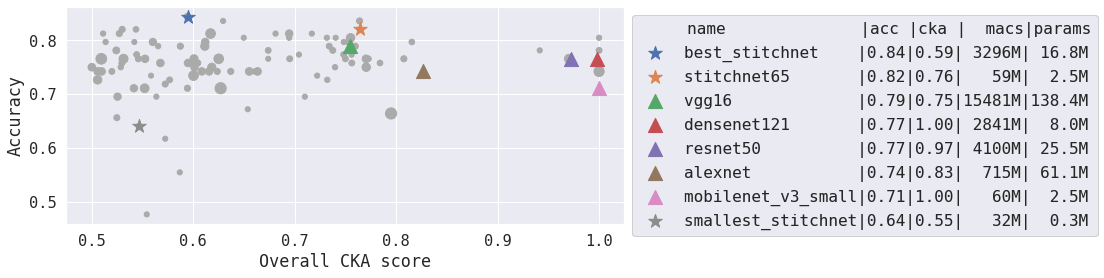

In [20]:
def pad(txt, maxL):
    if len(txt) >= maxL:
        return txt
    else:
        spaces_needed = maxL - len(txt)
        padded_txt = txt + " " * spaces_needed
        return padded_txt
    
sns.set(font_scale = 1.4)
plt.rcParams["font.family"] = "monospace"

maxL = 18

fig, ax = plt.subplots(figsize=[10, 4])

ax.scatter(score, acc, s=sizes, color="#aaaaaa")
plt.xlabel('Overall CKA score')
plt.ylabel('Accuracy')
# plt.ylim(0.4,1)
# plt.xlim(0.4,1.2)

label_accs = []
pnets = []
for netmeta in resultdata.iloc:
    if 'best' in netmeta.name or 'smallest' in netmeta.name or 'stitchnet' in netmeta.name:
        pnet = ax.scatter(netmeta.score, netmeta.acc, marker="*", s=200)
    else:
        pnet = ax.scatter(netmeta.score, netmeta.acc, marker="^", s=200)
    pnets.append(pnet)
    label_accs.append(f"{pad(netmeta.name,18)}|{netmeta.acc:.2f}|{netmeta.score:.2f}|{netmeta.macs/1e6:5.0f}M|{netmeta.params/1e6:5.1f}M")
# ax.legend(loc="best", ncol=3, bbox_to_anchor=(1,1))

leg1 = plt.legend(pnets, label_accs, loc="best", ncol=1, bbox_to_anchor=(1,1), title=f"     {pad('name',18)}|acc |cka |  macs|params", title_fontsize=16, fontsize=16)
# leg2 = plt.legend(pnets, ['']*len(pnets), loc="best", ncol=1, bbox_to_anchor=(1.4,1), title='cka')
leg1._legend_box.align = "left"
ax.add_artist(leg1)
# ax.add_artist(leg2)

plt.savefig(f'{figFolder}/accvscka.eps',bbox_inches='tight')

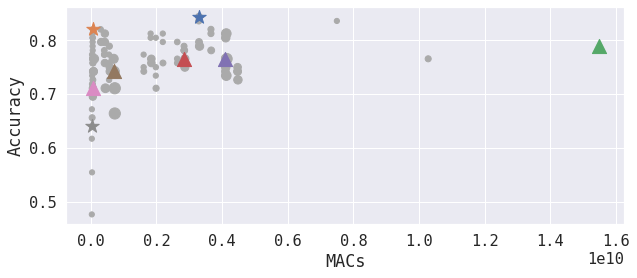

In [21]:
sns.set(font_scale = 1.4)
plt.rcParams["font.family"] = "monospace"

fig, ax = plt.subplots(figsize=[10, 4])

ax.scatter(macs, acc, s=sizes, color="#aaaaaa")
plt.xlabel('MACs')
plt.ylabel('Accuracy')
# plt.ylim(0.4,1)
# plt.xlim(0.4e8,0.7e8)

# draw label
# labels = range(len(score)) 
# j = 30
# for i, txt in enumerate(labels[j:j+1]):
#     ax.annotate(txt+1, (score[j+i], acc[j+i]), fontsize=8) 

label_accs = []
pnets = []
for netmeta in resultdata.iloc:
    if 'best' in netmeta.name or 'smallest' in netmeta.name or 'stitchnet' in netmeta.name:
        pnet = ax.scatter(netmeta.macs, netmeta.acc, marker="*", s=200)
    else:
        pnet = ax.scatter(netmeta.macs, netmeta.acc, marker="^", s=200)
    pnets.append(pnet)
    label_accs.append(f"{pad(netmeta.name,18)}|{netmeta.acc:.2f}|{netmeta.score:.2f}|{netmeta.macs/1e6:5.0f}M|{netmeta.params/1e6:5.1f}M")
# ax.legend(loc="best", ncol=3, bbox_to_anchor=(1,1))

# leg1 = plt.legend(pnets, label_accs, loc="best", ncol=1, bbox_to_anchor=(1,1), title=f"     {pad('name',18)}|acc |cka |  macs|params", title_fontsize=16, fontsize=16)
# # leg2 = plt.legend(pnets, ['']*len(pnets), loc="best", ncol=1, bbox_to_anchor=(1.4,1), title='cka')
# leg1._legend_box.align = "left"
# ax.add_artist(leg1)
# ax.add_artist(leg2)

# ax.legend(loc="best", ncol=3, bbox_to_anchor=(1,1))

# def on_click(event):
#     if event.button == 1:  # Left mouse button click
#         if event.inaxes is not None:
#             index = event.ind[0]
#             print(f"Clicked point index: {index}")
# fig.canvas.mpl_connect('button_press_event', on_click)
# plt.show()

plt.savefig(f'{figFolder}/accvsmacs_bean.eps',bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


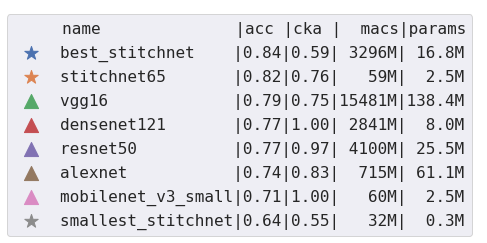

In [22]:
leg1 = plt.legend(pnets, label_accs, loc="best", ncol=1, bbox_to_anchor=(1,1), title=f"     {pad('name',18)}|acc |cka |  macs|params", title_fontsize=16, fontsize=16)
# leg2 = plt.legend(pnets, ['']*len(pnets), loc="best", ncol=1, bbox_to_anchor=(1.4,1), title='cka')
# leg1._legend_box.align = "left"
# ax.add_artist(leg1)
plt.gca().set_axis_off()
plt.savefig(f'{figFolder}/accvsmacs_bean_legend.eps',bbox_inches='tight')


In [29]:
from skimage.io import imread
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM, renderPDF
from pdf2image import convert_from_path

In [63]:
print('param_minidx', param_minidx)
print('acc_maxidx', acc_maxidx)

param_minidx 8
acc_maxidx 8


In [62]:
# for idx in data['acc'].nsmallest(100).index:
#     item = data.iloc[idx]
#     if item.score > 0.9:
#         print(idx, item.score, item.acc)

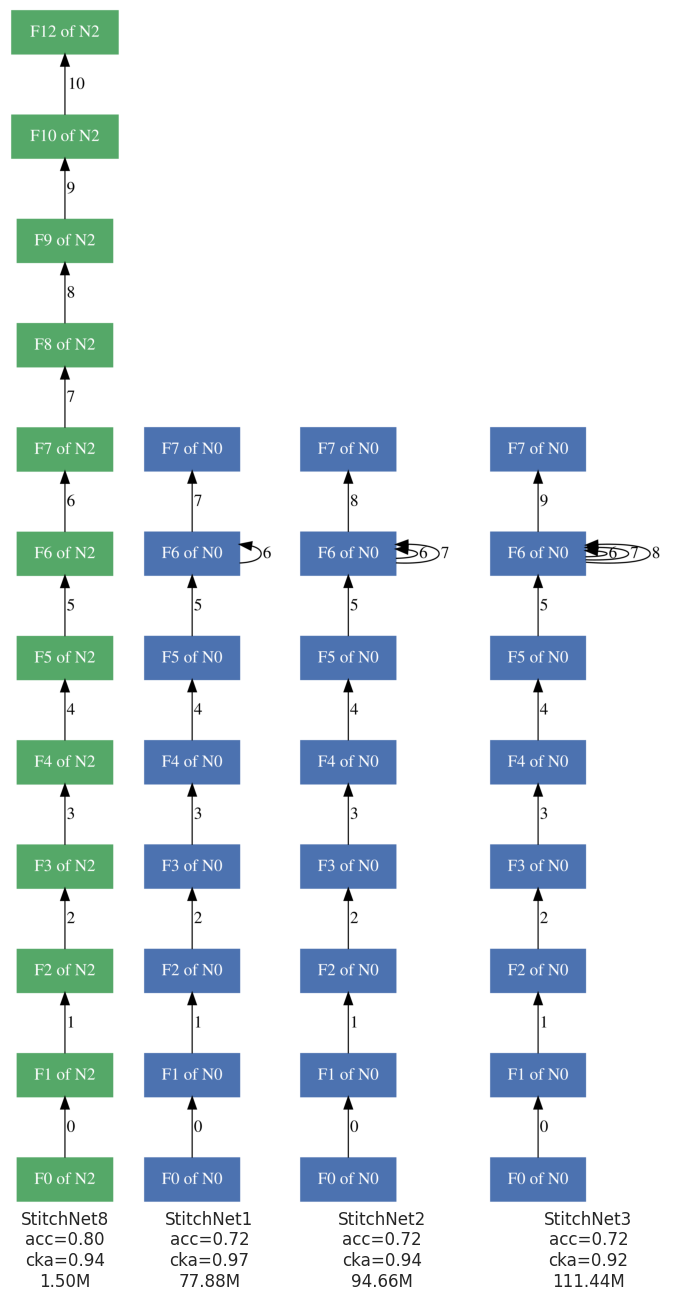

In [78]:
import os
sns.set(font_scale = 1.4)
def render_net(path):
    # if True or not os.path.exists(f"{path}.png"):
    drawing = svg2rlg(path)
    renderPDF.drawToFile(drawing, f'{path}.pdf')
    pages = convert_from_path(f'{path}.pdf', 600)
    pages[0].save(f'{path}.png', 'PNG')
    width = pages[0].width
    height = pages[0].height
    return width

def plot_net(ax, path, label):
    img = imread(path+'.png')
    ax.imshow(img)
    # ax.axis('off')
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax.get_yaxis().set_visible(False)
    # Hide grid lines
    ax.grid(False)
    ax.set_xlabel(label)

widths = []
# idxs = list(data['acc'].index)
idxs = list(set([param_minidx, acc_maxidx]))+[1,2,3]
for idx in idxs:
    netmeta = data.iloc[idx]
    width = render_net(netmeta.path)
    widths.append(width)

width_ratios = np.array(widths).astype(float)/max(widths)
# print(width_ratios)
fig, axs = plt.subplots(1,len(idxs),figsize=[10, 70],gridspec_kw={'width_ratios': width_ratios})

# def is_iterable(obj):
#     try:
#         iter(obj)
#         return True
#     except TypeError:
#         return False

for ax in axs:
    ax.set_anchor('S')

for i,idx in enumerate(idxs):
    # print(i,idx)
    netmeta = data.iloc[idx]
    pages = plot_net(axs[i],netmeta.path, f'StitchNet{idx}\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')

# netmeta = data.iloc[param_minidx]
# pages = plot_net(axs[0],netmeta.path, f'Smallest\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# netmeta = data.iloc[acc_maxidx]
# plot_net(axs[1],netmeta.path, f'Best\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# netmeta = data.iloc[param_maxidx]
# plot_net(axs[2],netmeta.path, f'Biggest\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# netmeta = data.iloc[acc_minidx]
# plot_net(axs[3],netmeta.path, f'Worst\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# plot_net(axs[1],data.iloc[param_maxidx].path, f'Biggest')
# plot_net(axs[2],data.iloc[acc_maxidx].path, f'Best')
# plot_net(axs[3],data.iloc[acc_minidx].path, f'Worst')
plt.tight_layout()
plt.savefig(f'{figFolder}/stitchnets.eps',bbox_inches='tight')

<AxesSubplot:>

In [66]:
# len(idxs)

In [ ]:
sns.set(font_scale = 1.6)

fig, axs = plt.subplots(1,len(originalNetNames),figsize=[10, 70],gridspec_kw={'wspace': 0.05,'width_ratios': [1,1,1.1,1,1.1]})
for ax in axs:
    ax.set_anchor('S')

for i,name in enumerate(originalNetNames): 
    if name == 'mobilenet_v3_small':
        textname = 'mobilenet'
    else:
        textname = name
    netmeta = originalValTrainAcc[name]
    plot_net(axs[i],f"_results/original/{name}.svg", f'{textname}')
    # plot_net(axs[i],f"_results/original/{name}.svg", f'{textname}\nacc={netmeta.valacc.item():.2f}\ncka={netmeta.score.item():.2f}\n{netmeta.params.item()/1e6:.2f}M')
    # plt.tight_layout()
    
plt.savefig(f'{figFolder}/originals.eps',bbox_inches='tight')



In [ ]:
# from glob import glob
# import pandas as pd
# import os
# import seaborn as sns
# ftdata = {}
# filenames = sorted(glob('_results/finetune/*.txt'))
# for filename in filenames:
#     name = os.path.basename(filename).split('.')[0]    
#     ftdata[name] = pd.read_csv(filename, names=['num_samples','acc'])
# # ftdata

In [ ]:
from glob import glob
import pandas as pd
import os
import seaborn as sns
ftdata = {}

nets = sorted(glob('_results/finetune/*'))
for net in nets:
    netname = os.path.basename(net)
    filenames = sorted(glob(f'{net}/*.txt'))
    allftdata = {}
    for filename in filenames:
        name = os.path.basename(filename).split('.')[0]    
        allftdata[name] = pd.read_csv(filename, names=['num_samples','acc'])
        
    netdata = {}
    xaxis = list(allftdata.values())[0].num_samples
    netdata[net] = np.array([x.acc for x in allftdata.values()])
    print(np.mean(netdata[net], 0), np.std(netdata[net], 0))

    ftdata[netname] = pd.DataFrame({
        'num_samples': xaxis,
        'acc': np.mean(netdata[net], 0),
        'accstd': np.std(netdata[net], 0)
    })
    # break

In [ ]:
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(font_scale = 1.4)

fig, ax = plt.subplots(1,1,figsize=[11, 5])
sns.set(font_scale = 1.4)

idxs = list(data['acc'].nlargest(1).index)
netmeta = data.iloc[idxs[0]]
k,series = list(ftdata.items())[0]
ax.scatter([32], netmeta.acc, marker="*", s=160, 
           color="red", label=f"StitchNet21\nacc@32={netmeta.acc:.2f}")
for k,series in ftdata.items():
    label = f'{k}\nacc@{max(series.num_samples)}={series.acc.iloc[-1]:.2f}±{series.accstd.iloc[-1]:.2f}'
    ax.errorbar(series.num_samples, series.acc, series.accstd, label=label, linestyle='-', marker='.', markersize=15)
    # ax.plot(series.num_samples, series.acc, '.-', markersize=15, label=label)
# plt.xlim(0,400)
plt.ylim(-0.1, 1)
ax.legend(loc=4, ncol=2)
plt.xlabel('The number of training samples processed')
plt.ylabel('Accuracy')

plt.savefig(f'{figFolder}/finetune.eps',bbox_inches='tight')

In [ ]:
import pandas as pd

figFolder = f'_results/{RESULT_NAME}_figures'
os.makedirs(figFolder, exist_ok=True)

ensembleData = pd.read_csv(f'_results/{RESULT_NAME}_ensemble_10_T_0.8.txt', names=['acc', 'indvacc'])
accs = ensembleData.acc
indvaccs = ensembleData.indvacc

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set(font_scale = 1.4)

plt.figure(figsize=(10,4))
plt.plot(range(1,1+len(accs)), [d for d in accs], label='Ensemble Accuracy')
plt.scatter(range(1,1+len(indvaccs)), [d for d in indvaccs], s=80, label='Individual Accuracy')
plt.xlabel('Model in the ensemble')
plt.xticks(range(1,len(indvaccs)+1))
# plt.ylim(0.4,1)
plt.ylabel('Accuracy')
lgd = plt.legend(loc=3)


plt.savefig(f'{figFolder}/ensemble.eps', bbox_extra_artists=(lgd,), bbox_inches='tight')